# IPND Data Analyst Final Project by bjemcnally version 1.0

## Using the most recent baseball stats data available here:
http://www.seanlahman.com/baseball-archive/statistics/


## I pose and attempt to answer the following questions:
1. What was the highest number of HRs hit across both leagues in each year? 
2. Since the implementation of the designated hitter (DH) in the American League (AL), have AL teams scored more runs than National League teams (total runs scored or team average)?
3. Are NL pitchers better hitters than AL pitchers?
4. Does a teams record correlate with their payroll? Looking specifically at SF Giants and LA Dodgers since 1985.
5. How many Giants have appeared in All Star games?

## Please note that all results are tentative!

# Question 1: What was the highest number of HRs hit across both leagues in each year?

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

batting_df = pd.read_csv('baseball/core/Batting.csv')

In [75]:
batting_group_year = batting_df.groupby(['yearID'])

In [76]:
max_HR_by_year = batting_group_year.max()['HR']

In [77]:
years = batting_df['yearID'].drop_duplicates()

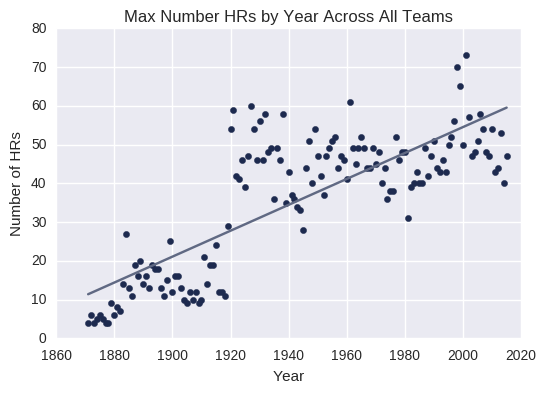

In [78]:
%matplotlib inline

x = years
y = max_HR_by_year

plt.scatter(x, y, color = '#1d2a4f', label='Max HRs')

plt.title('Max Number HRs by Year Across All Teams')
plt.xlabel('Year')
plt.ylabel('Number of HRs')
plt.xlim(1860, 2020)
plt.ylim(0, 80)

# add trendline

m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.', color = '#1d2a4f')
plt.plot(x, m*x + b, '-', color = '#606983')

### Results and Discussion Part 1-1

The annual high in number of HRs hit by a single individual has risen dramatically since the beginning of baseball. The 'Steroid Era' is thought to correspond to the late 1980's through early 2000's which appears to correlate with a peak in these data, or at least the three highest data points. 

Another way to look at this would be to graph the league-wide average over time...

In [79]:
average_HR_by_year = batting_group_year.mean()['HR']

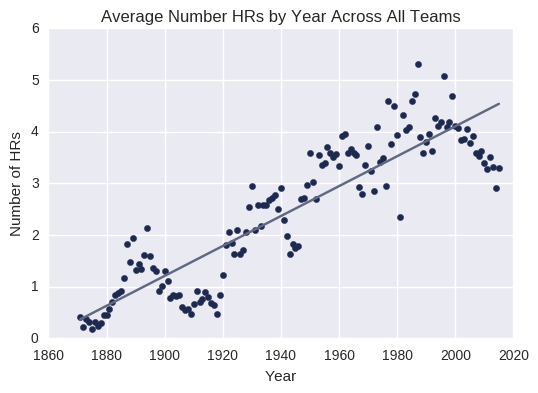

In [80]:
%matplotlib inline

x = years
y = average_HR_by_year

plt.scatter(x, y, color = '#1d2a4f', label='Average HRs')

plt.title('Average Number HRs by Year Across All Teams')
plt.xlabel('Year')
plt.ylabel('Number of HRs')
plt.xlim(1860, 2020)
plt.ylim(0, 6)

# add trendline

m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.', color = '#1d2a4f')
plt.plot(x, m*x + b, '-', color = '#606983')

### Results and Discussion Part 1-2

The increase over time is also apparent when looking at the average number of HRs hit by year.

I was surprised that the average was so low, but closer inspection of the data showed that there were many players who never hit any.

Another way to look at this would be the total number hit each year:

In [81]:
total_HR_by_year = batting_group_year.sum()['HR']

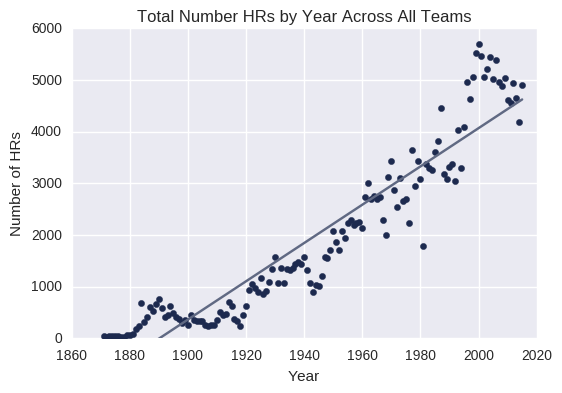

In [82]:
%matplotlib inline

x = years
y = total_HR_by_year

plt.scatter(x, y, color = '#1d2a4f', label='Total HRs')

#total_HR_by_year.plot

plt.title('Total Number HRs by Year Across All Teams')
plt.xlabel('Year')
plt.ylabel('Number of HRs')
plt.xlim(1860, 2020)
plt.ylim(0, 6000)

# add trendline

m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.', color = '#1d2a4f')
plt.plot(x, m*x + b, '-', color = '#606983')

### Results and Discussion Part 1-3

Looking at the total number of HRs by year shows the most dramatic increase! Once again, the peak in the data corresponds with the steroid era.

This made me wonder who hit the most HR in a single year:

In [83]:
just_players_and_HR = batting_df.loc[:,['yearID', 'playerID', 'HR']]

just_players_and_HR.max()['HR']

73.0

In [84]:
# now I know 73 was the highest number hit, and my graph tells me this occurred in 2001...

year_2001_only = just_players_and_HR[just_players_and_HR.yearID == 2001]

In [85]:
year_2001_high = year_2001_only[year_2001_only.HR == 73]

year_2001_high

,yearID,playerID,HR
80750,2001,bondsba01,73.0


### Results and Discussion Part 1-4

Highest number of HRs hit by an individual in one year was by Barry Bonds who hit 73 in 2001.

# Question 2: Does the batting data differ between the two leagues since the DH was implemented (1973-present)? More specifically, have AL teams scored more runs than NL teams?

"In baseball, the designated hitter rule is the common name for Major League Baseball Rule 5.11, adopted by the American League in 1973. The rule allows teams to have one player, known as the designated hitter (abbreviated DH), to bat in place of the pitcher."

Source: https://en.wikipedia.org/wiki/Designated_hitter

In [95]:
DH_implemented = 1973 # DH = designated hitter
batting_since_DH = batting_df[batting_df.yearID >= DH_implemented]

In [96]:
AL_batting_since_DH = batting_since_DH[batting_since_DH.lgID == 'AL']

In [97]:
NL_batting_since_DH = batting_since_DH[batting_since_DH.lgID == 'NL']

In [98]:
AL_batting_since_DH_tot_runs_by_year = AL_batting_since_DH.groupby('yearID').sum()['R']

In [99]:
NL_batting_since_DH_tot_runs_by_year = NL_batting_since_DH.groupby('yearID').sum()['R']

In [100]:
DH_years = batting_since_DH['yearID'].drop_duplicates()

(1970, 2020)

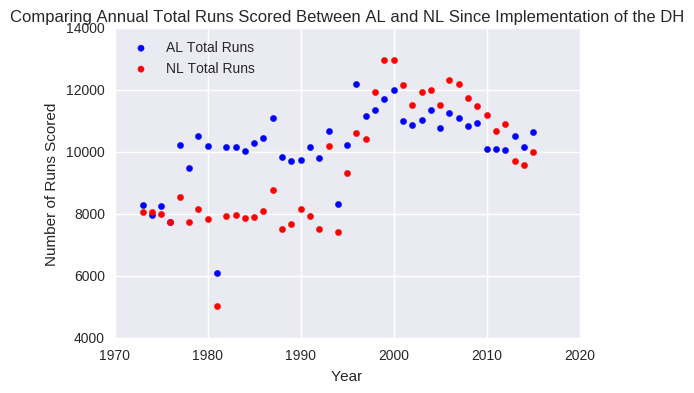

In [101]:
%matplotlib inline

x = DH_years
y1 = AL_batting_since_DH_tot_runs_by_year
y3 = NL_batting_since_DH_tot_runs_by_year

plt.scatter(x, y1, color = 'blue', label='AL Total Runs')
plt.scatter(x, y3, color = 'red', label='NL Total Runs')

plt.title('Comparing Annual Total Runs Scored Between AL and NL Since Implementation of the DH')
plt.xlabel('Year')
plt.ylabel('Number of Runs Scored')
plt.legend(loc='upper left')
plt.xlim(1970, 2020)
# plt.ylim(0, 80)

### Results and Discussion Part 2-1

Looking at the total number of runs by year shows that, at first, AL teams did score more total runs than NL teams. However, the difference is almost negligible in more recent years.

The especially low number of runs scored in both leagues in 1981 corresponds to the 1981 strike which resulted in the cancellation of 713 games, or 38% of the season.

Source: https://en.wikipedia.org/wiki/1981_Major_League_Baseball_strike

What if you look at the average number of runs scored by an individual each year...

In [107]:
AL_batting_since_DH_mean_runs_by_year = AL_batting_since_DH.groupby('yearID').mean()['R']

In [108]:
NL_batting_since_DH_mean_runs_by_year = NL_batting_since_DH.groupby('yearID').mean()['R']

(1970, 2020)

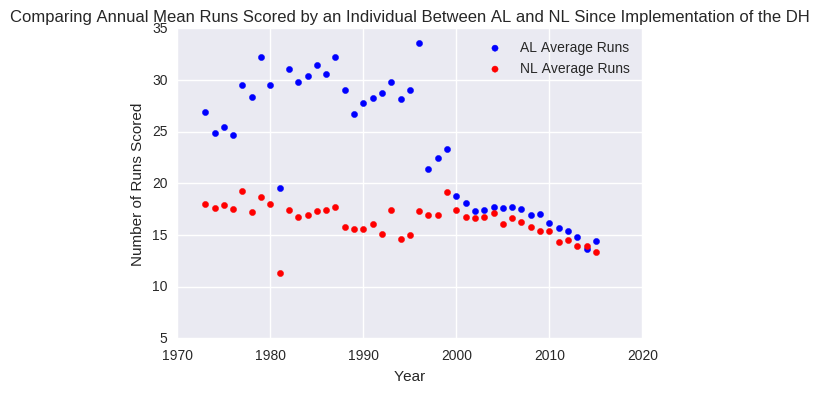

In [109]:
%matplotlib inline

x = DH_years
y2 = AL_batting_since_DH_mean_runs_by_year
y4 = NL_batting_since_DH_mean_runs_by_year

plt.scatter(x, y2, color = 'blue', label='AL Average Runs')

plt.scatter(x, y4, color = 'red', label='NL Average Runs')

plt.title('Comparing Annual Mean Runs Scored by an Individual Between AL and NL Since Implementation of the DH')
plt.xlabel('Year')
plt.ylabel('Number of Runs Scored')
plt.legend(loc='upper right')
plt.xlim(1970, 2020)

### Results and Discussion Part 2-2

Looking at the mean number of runs by year shows is equally as dramatic early on, but, again, shows that the difference is almost non-existent since ~2000. It should be noted that there are more differences between AL and NL than just the designated hitter, including size of ballpark, and that therefore the differences observed can not be explained by the implementation of the DH alone.

What if you look at the average number of runs scored by a team each year...

In [110]:
NL_batting_since_DH_mean_runs_by_year_and_team = NL_batting_since_DH.groupby(['yearID','teamID'])

In [111]:
NL_tot_runs_per_team = NL_batting_since_DH_mean_runs_by_year_and_team.sum()['R']

In [112]:
def find_mean_by_series_index(series_name, index_start, index_end):
    """Takes in a Series and averages all values with the same index"""
    start = index_start
    list_of_averages = []
    while start <= index_end:
        index_average = series_name[start].mean()
        start += 1
        list_of_averages.append(index_average)
    return list_of_averages

In [113]:
NL_avg_runs_per_year = find_mean_by_series_index(NL_tot_runs_per_team, 1973, 2015)

In [114]:
AL_batting_since_DH_mean_runs_by_year_and_team = AL_batting_since_DH.groupby(['yearID','teamID'])

In [115]:
AL_tot_runs_per_team = AL_batting_since_DH_mean_runs_by_year_and_team.sum()['R']

In [116]:
AL_avg_runs_per_year = find_mean_by_series_index(AL_tot_runs_per_team, 1973, 2015)

(1970, 2020)

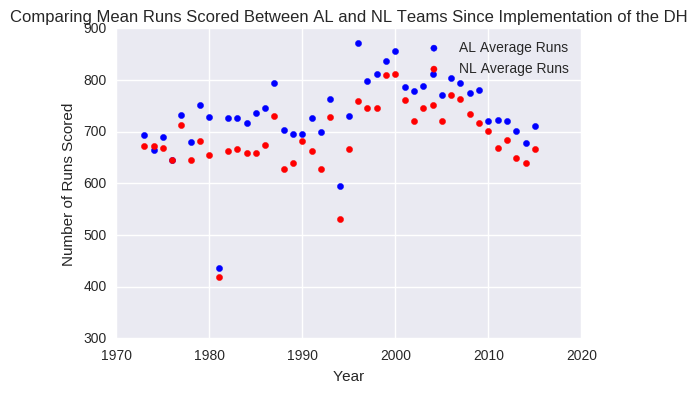

In [117]:
%matplotlib inline

x = DH_years
y2 = AL_avg_runs_per_year
y4 = NL_avg_runs_per_year

plt.scatter(x, y2, color = 'blue', label='AL Average Runs')

plt.scatter(x, y4, color = 'red', label='NL Average Runs')

plt.title('Comparing Mean Runs Scored Between AL and NL Teams Since Implementation of the DH')
plt.xlabel('Year')
plt.ylabel('Number of Runs Scored')
plt.legend(loc='upper right')
plt.xlim(1970, 2020)
# plt.ylim(0, 80)

### Results and Discussion Part 2-3

When you compare mean runs scored by a team as a whole, the difference is significantly less dramatic. However, in most cases, according to this graph, AL teams still scored more runs than NL teams.

# Question 3: Since the implementation of the DH, are NL pitchers better hitters than AL pitchers?

You might expect that when building a NL team, one might look for pitchers who can hit and that AL teams really wouldn't care one way or the other. It might be easiest to analyse this by looking at Hits per At Bat (H/AB) or even Runs Batted In per At Bat (RBI/AB).

In [118]:
# need to import position data from fielding table
fielding_df = pd.read_csv('baseball/core/Fielding.csv')

In [119]:
pitcher_fielding = fielding_df[fielding_df.POS == 'P']

In [120]:
pitcher_fielding_since_DH = pitcher_fielding[pitcher_fielding.yearID >= DH_implemented]

In [121]:
just_pitcher_pos_data = pitcher_fielding_since_DH.loc[:,['playerID', 'POS']]

In [122]:
# merge pitcher info with batting, retain only pitcher data
pitcher_batting_since_DH = just_pitcher_pos_data.merge(batting_since_DH, on = 'playerID', how = 'outer')

In [123]:
NL_pitcher_batting_since_DH = pitcher_batting_since_DH[pitcher_batting_since_DH.lgID == 'NL']

In [124]:
AL_pitcher_batting_since_DH = pitcher_batting_since_DH[pitcher_batting_since_DH.lgID == 'AL']

In [125]:
NL_hits_per_at_bat = NL_pitcher_batting_since_DH.loc[:,'H'] / NL_pitcher_batting_since_DH.loc[:,'AB']

NL_hits_per_at_bat.mean()

0.14518886825906355

In [126]:
AL_hits_per_at_bat = AL_pitcher_batting_since_DH.loc[:,'H'] / AL_pitcher_batting_since_DH.loc[:,'AB']

AL_hits_per_at_bat.mean()

0.16553521762717532

In [127]:
NL_HR_per_at_bat = NL_pitcher_batting_since_DH.loc[:,'HR'] / NL_pitcher_batting_since_DH.loc[:,'AB']

NL_HR_per_at_bat.mean()

0.006018239803027655

In [128]:
AL_HR_per_at_bat = AL_pitcher_batting_since_DH.loc[:,'HR'] / AL_pitcher_batting_since_DH.loc[:,'AB']

AL_HR_per_at_bat.mean()

0.01171269832270805

In [129]:
NL_pitcher_batting_since_DH.loc[:,'AB'].sum()

5486828.0

In [130]:
AL_pitcher_batting_since_DH.loc[:,'AB'].sum()

3373237.0

### Results and Discussion Part 3

According to my analysis, AL pitchers have more hits per at bat (0.166 vs 0.145) and nearly twice as many homeruns per at bat (0.0117 vs 0.0060) than NL pitchers. 

I found this result to be very surprising and not at all what I expected.

Some caveats here include the fact that AL pitchers have significantly fewer total at bats and, as mentioned earlier, that AL ballparks are often more hit-friendly than NL ballparks.

# Question 4: Does a teams payroll correlate with their win record? 

To attempt to answer this question, I looked at data from the SF Giants and LA Dodgers over the last 30 years (1985-2015).

In [131]:
salaries_df = pd.read_csv('baseball/core/Salaries.csv')

In [132]:
SFN_salaries = salaries_df[salaries_df.teamID == 'SFN']

In [133]:
LAN_salaries = salaries_df[salaries_df.teamID == 'LAN']

In [134]:
SFN_payroll_by_year = SFN_salaries.groupby('yearID').sum()

In [135]:
LAN_payroll_by_year = LAN_salaries.groupby('yearID').sum()

In [136]:
# need annual record data from Teams table
teams_df = pd.read_csv('baseball/core/Teams.csv')

In [137]:
SFN_teams = teams_df[teams_df.teamID == 'SFN']

In [138]:
SFN_teams_since_1985 = SFN_teams[SFN_teams.yearID >= 1985]

In [139]:
SFN_record_since_1985 = SFN_teams_since_1985['W'] / SFN_teams_since_1985['G']

In [140]:
LAN_teams = teams_df[teams_df.teamID == 'LAN']

In [141]:
LAN_teams_since_1985 = LAN_teams[LAN_teams.yearID >= 1985]

In [142]:
LAN_record_since_1985 = LAN_teams_since_1985['W'] / LAN_teams_since_1985['G']

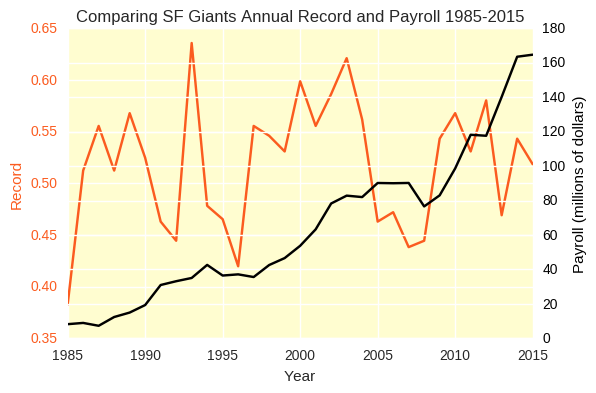

In [143]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = '#FFFDD0'

"""
This graph was generated with help from the following pages:

http://matplotlib.org/examples/api/two_scales.html
http://stackoverflow.com/questions/14088687/how-to-change-plot-background-color
http://teamcolorcodes.com/san-francisco-giants-color-codes/
"""

fig, ax1 = plt.subplots()

x = range(1985, 2016)
y1 = SFN_record_since_1985
ax1.plot(x, y1, '#FB5B1F')
ax1.set_xlabel('Year')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Record', color='#FB5B1F')
for tl in ax1.get_yticklabels():
    tl.set_color('#FB5B1F')

ax2 = ax1.twinx()
y2 = (SFN_payroll_by_year / 1000000)
ax2.plot(x, y2, 'k')
ax2.set_ylabel('Payroll (millions of dollars)', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
plt.title('Comparing SF Giants Annual Record and Payroll 1985-2015')
plt.show()

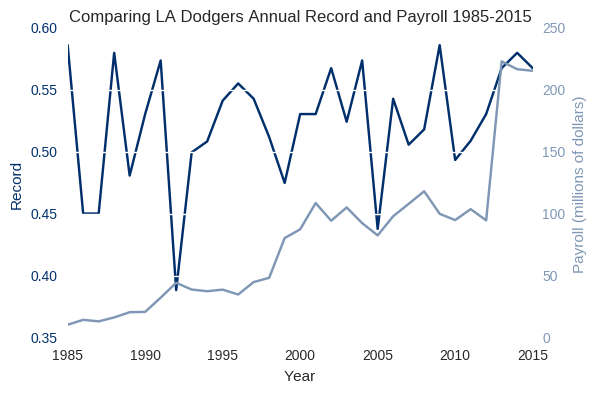

In [181]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = '#FFFFFF'

"""
This graph was generated with help from the following pages:

http://matplotlib.org/examples/api/two_scales.html
http://stackoverflow.com/questions/14088687/how-to-change-plot-background-color
http://teamcolorcodes.com/los-angeles-dodgers-color-codes/
http://www.color-hex.com/color/002f6c
"""

fig, ax1 = plt.subplots()

x = range(1985, 2016)
y1 = LAN_record_since_1985
ax1.plot(x, y1, '#002F6C')
ax1.set_xlabel('Year')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Record', color='#002F6C')
for tl in ax1.get_yticklabels():
    tl.set_color('#002F6C')


ax2 = ax1.twinx()
y2 = (LAN_payroll_by_year / 1000000)
ax2.plot(x, y2, '#7f97b5')
ax2.set_ylabel('Payroll (millions of dollars)', color='#7f97b5')
for tl in ax2.get_yticklabels():
    tl.set_color('#7f97b5')
plt.title('Comparing LA Dodgers Annual Record and Payroll 1985-2015')
plt.show()

### Results and Discussion Part 4

According to my analysis, there doesn't appear to be a relationship between payroll and win record (Win/Games played) for these two teams.

It is interesting to see the staggering increase in payroll for both teams, especially in recent years!

# Question 5: How many SF Giants players have appeared in each All Star Game since the team moved to San Francisco?

In [144]:
allstar_df = pd.read_csv('baseball/core/AllstarFull.csv')

In [145]:
giants_allstar_appearances = allstar_df[allstar_df.teamID == 'SFN']

In [146]:
giants_allstar_appearances_by_year = giants_allstar_appearances.groupby('yearID').count()

(0, 10)

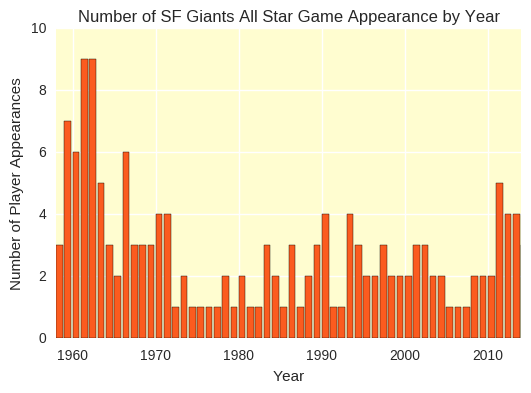

In [147]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = '#FFFDD0'
%matplotlib inline

x = range(1958,2015)
y = giants_allstar_appearances_by_year['playerID']

plt.bar(x, y, color = '#FB5B1F', label='AL Average Runs')

plt.title('Number of SF Giants All Star Game Appearance by Year')
plt.xlabel('Year')
plt.ylabel('Number of Player Appearances')
plt.xlim(1958, 2014)
plt.ylim(0, 10)

### Results and Discussion Part 5

The graph shoes that since 1958, each NL All Star team has had at least one player from the Giants. The peak was 9 players in 1961 and 1962.

A follow up question that might be worth investigating is whether or not there are any teams that have not been represented by their league's All Star team.